In [9]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [3]:
path='/Users/irak/Documents/py_viz/tabular-playground-series-jan-2021/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/irak/Documents/py_viz/tabular-playground-series-jan-2021/test.csv
/Users/irak/Documents/py_viz/tabular-playground-series-jan-2021/train.csv
/Users/irak/Documents/py_viz/tabular-playground-series-jan-2021/sample_submission.csv


In [4]:
train = pd.read_csv(path+'train.csv', sep=',', index_col='id')
sample_submission=pd.read_csv(path+'sample_submission.csv', sep=',', index_col='id')
test = pd.read_csv(path+'test.csv', sep=',', index_col='id')

print('train data')
display(train.head())

train data


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


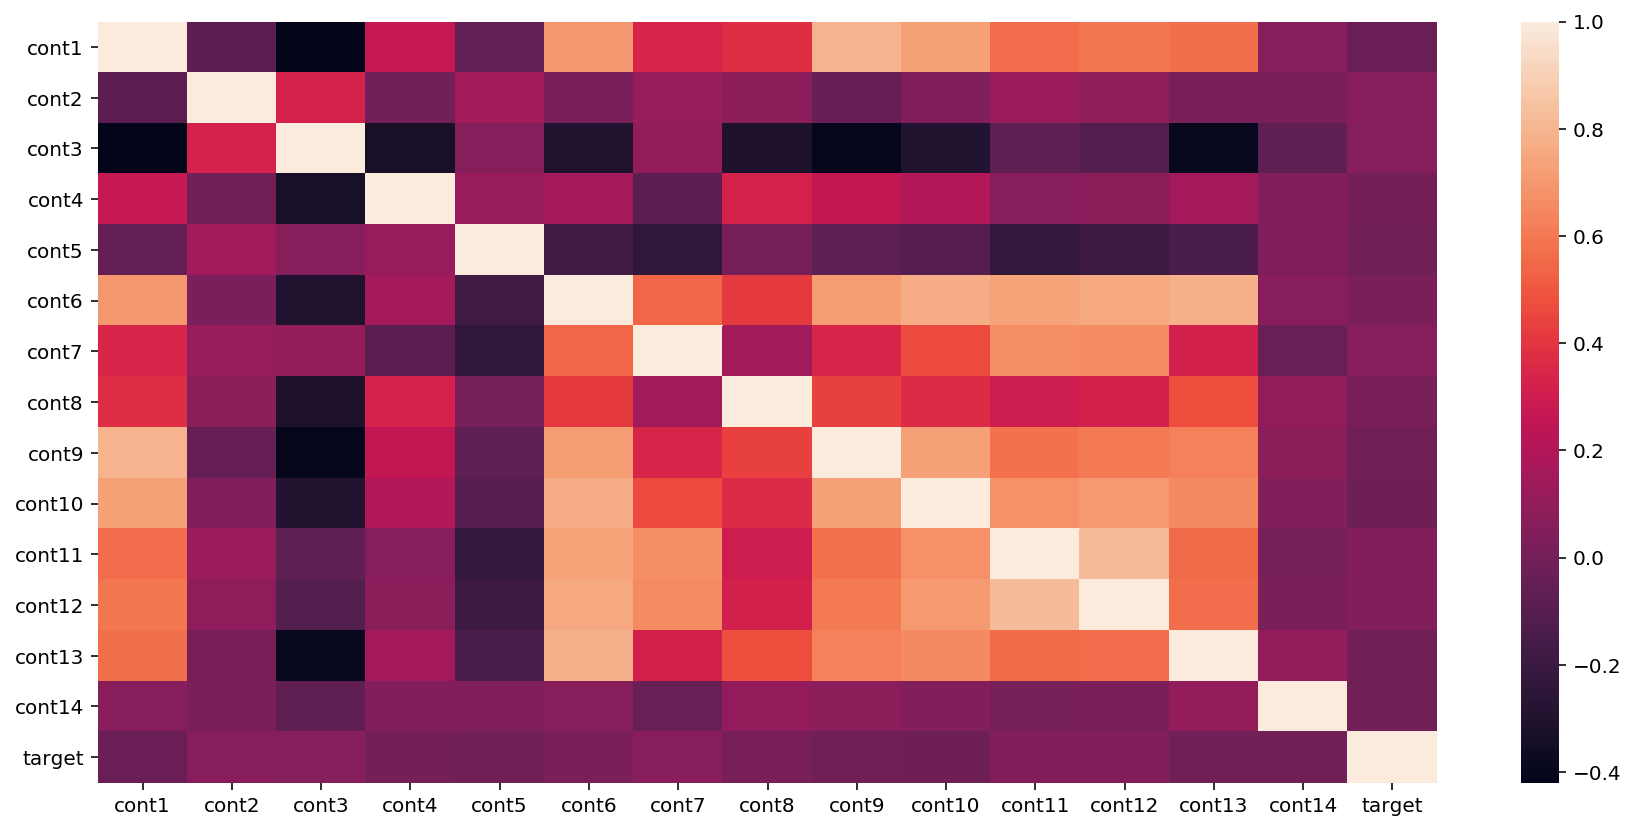

In [36]:
corr = train.corr()
plt.figure(figsize=(15, 7))
ax = sns.heatmap(corr)

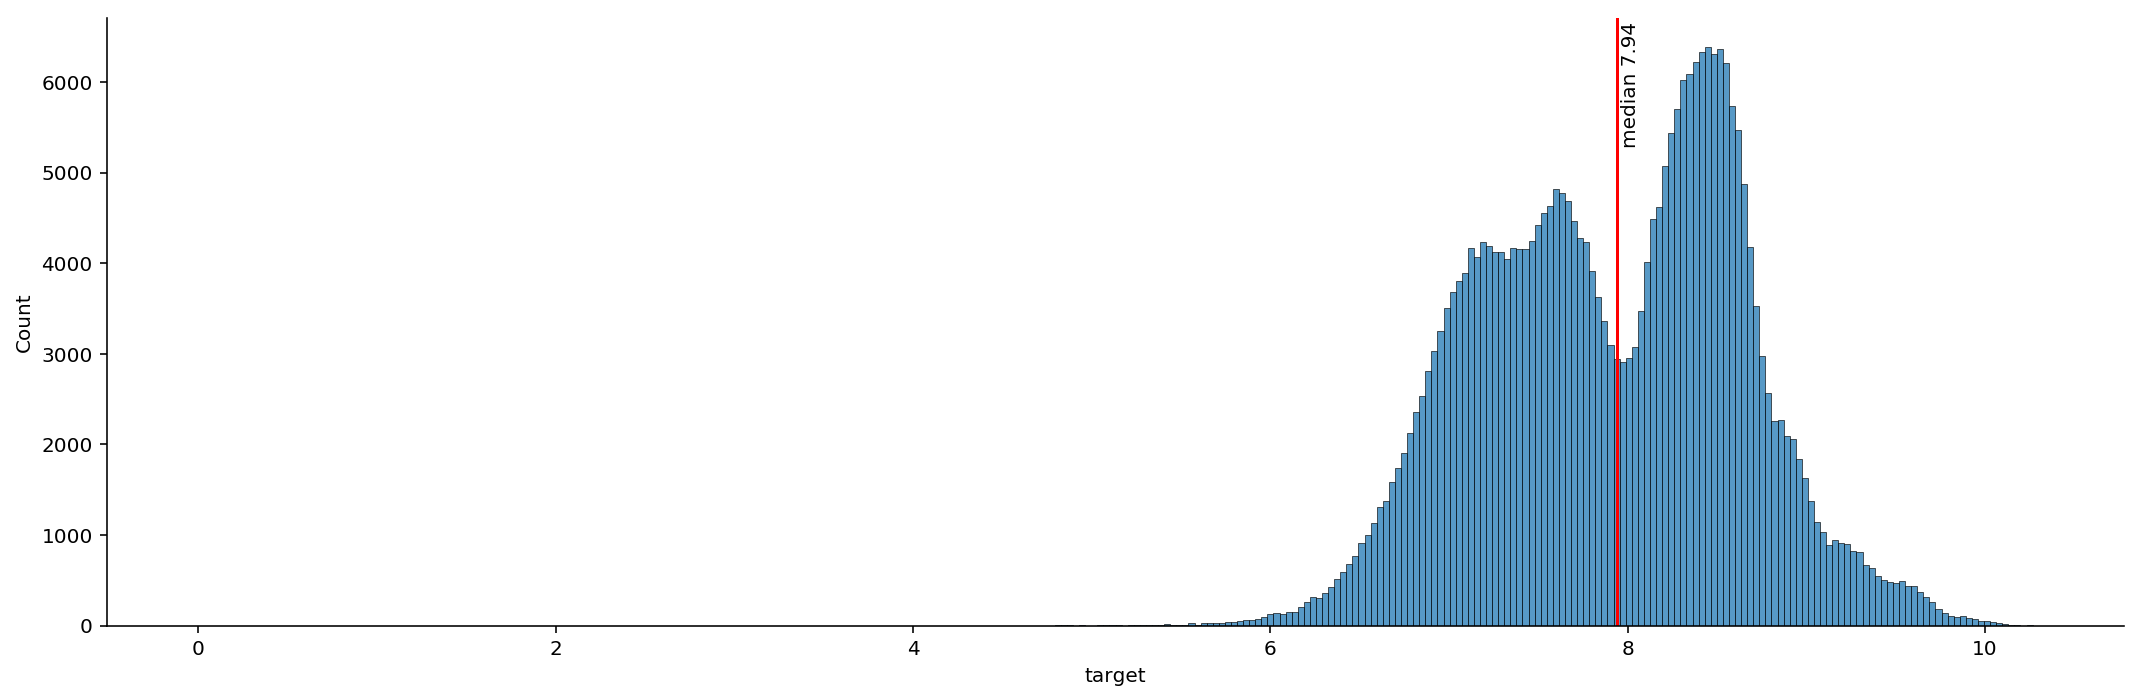

In [158]:
ax = sns.displot(data=train['target'], height=5, aspect=3)
plt.axvline(train['target'].median(), 0, color="red")
lab = plt.text(train['target'].median() + 0.02 ,6500,'median 7.94', rotation=90)

Посмотрим на все переменные одновременно

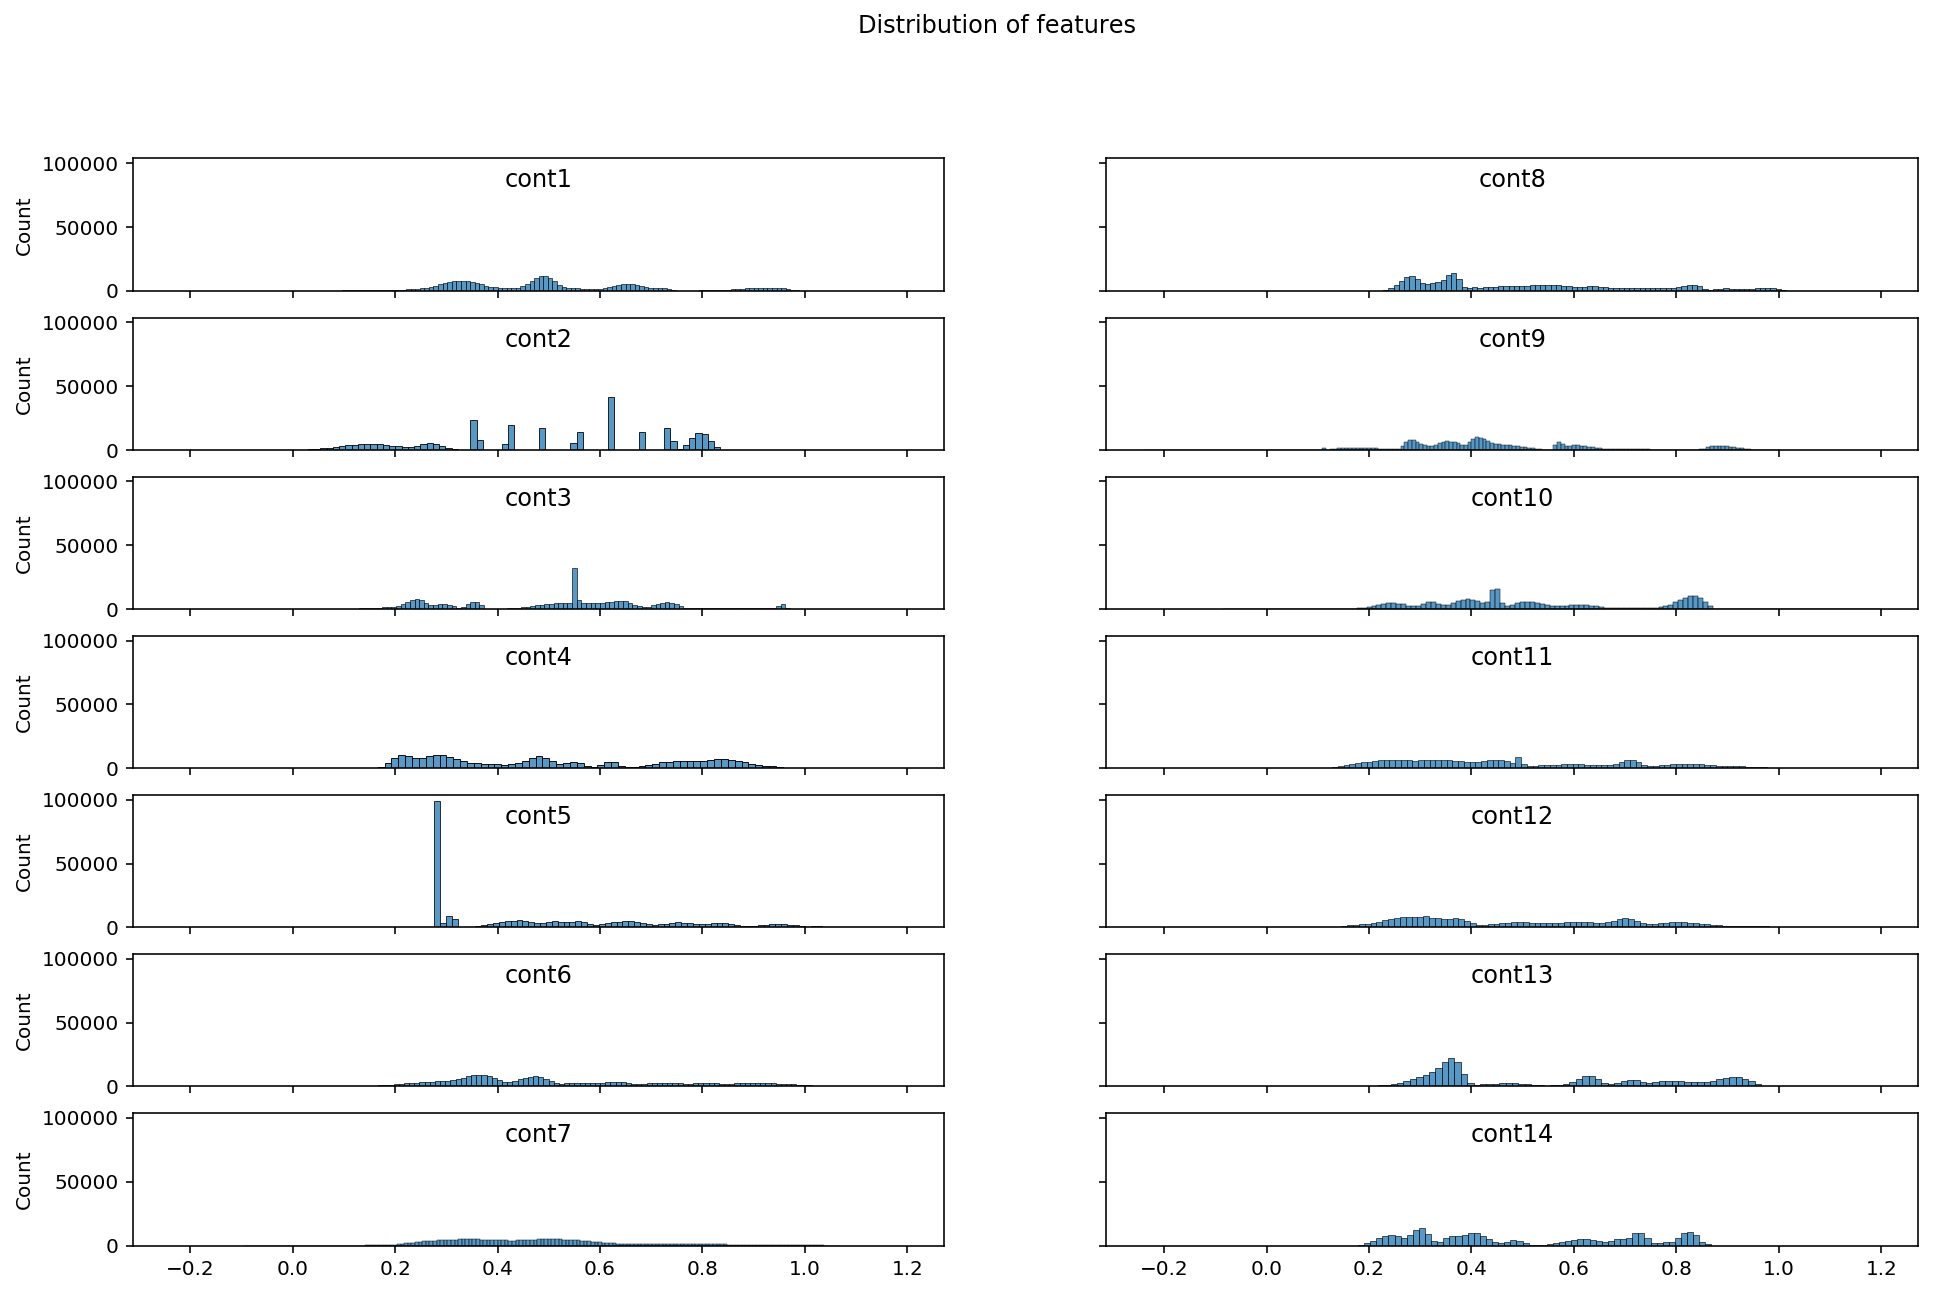

In [148]:
fig, axes = plt.subplots(7, 2, sharex=True, sharey=True, figsize=(16,10))
fig.suptitle('Distribution of features')

# Bulbasaur
# sns.histplot(ax=axes[0, 0], data=train, x='cont1')
# sns.histplot(ax=axes[0, 1], data=train, x='cont2')

n = 0
for c in train.iloc[:,:7].columns:
    sns.histplot(ax=axes[n, 0], data = train[c].values)
    axes[n, 0].set_title(train.columns[n], pad = -14.5)
    n+=1
    
k = 0
for c in train.iloc[:,7:14].columns:
    sns.histplot(ax=axes[k, 1], data = train[c].values)
    axes[k, 1].set_title(train.columns[k + 7], pad = -14.5)
    k+=1


Некоторые из распределений сильно отличаются от большинства - cont2, cont3, cont5. Они смещают общую для всех графиков шкалу Y, поэтому их придётся отделить, чтобы увидеть распределения с меньшими пиками.

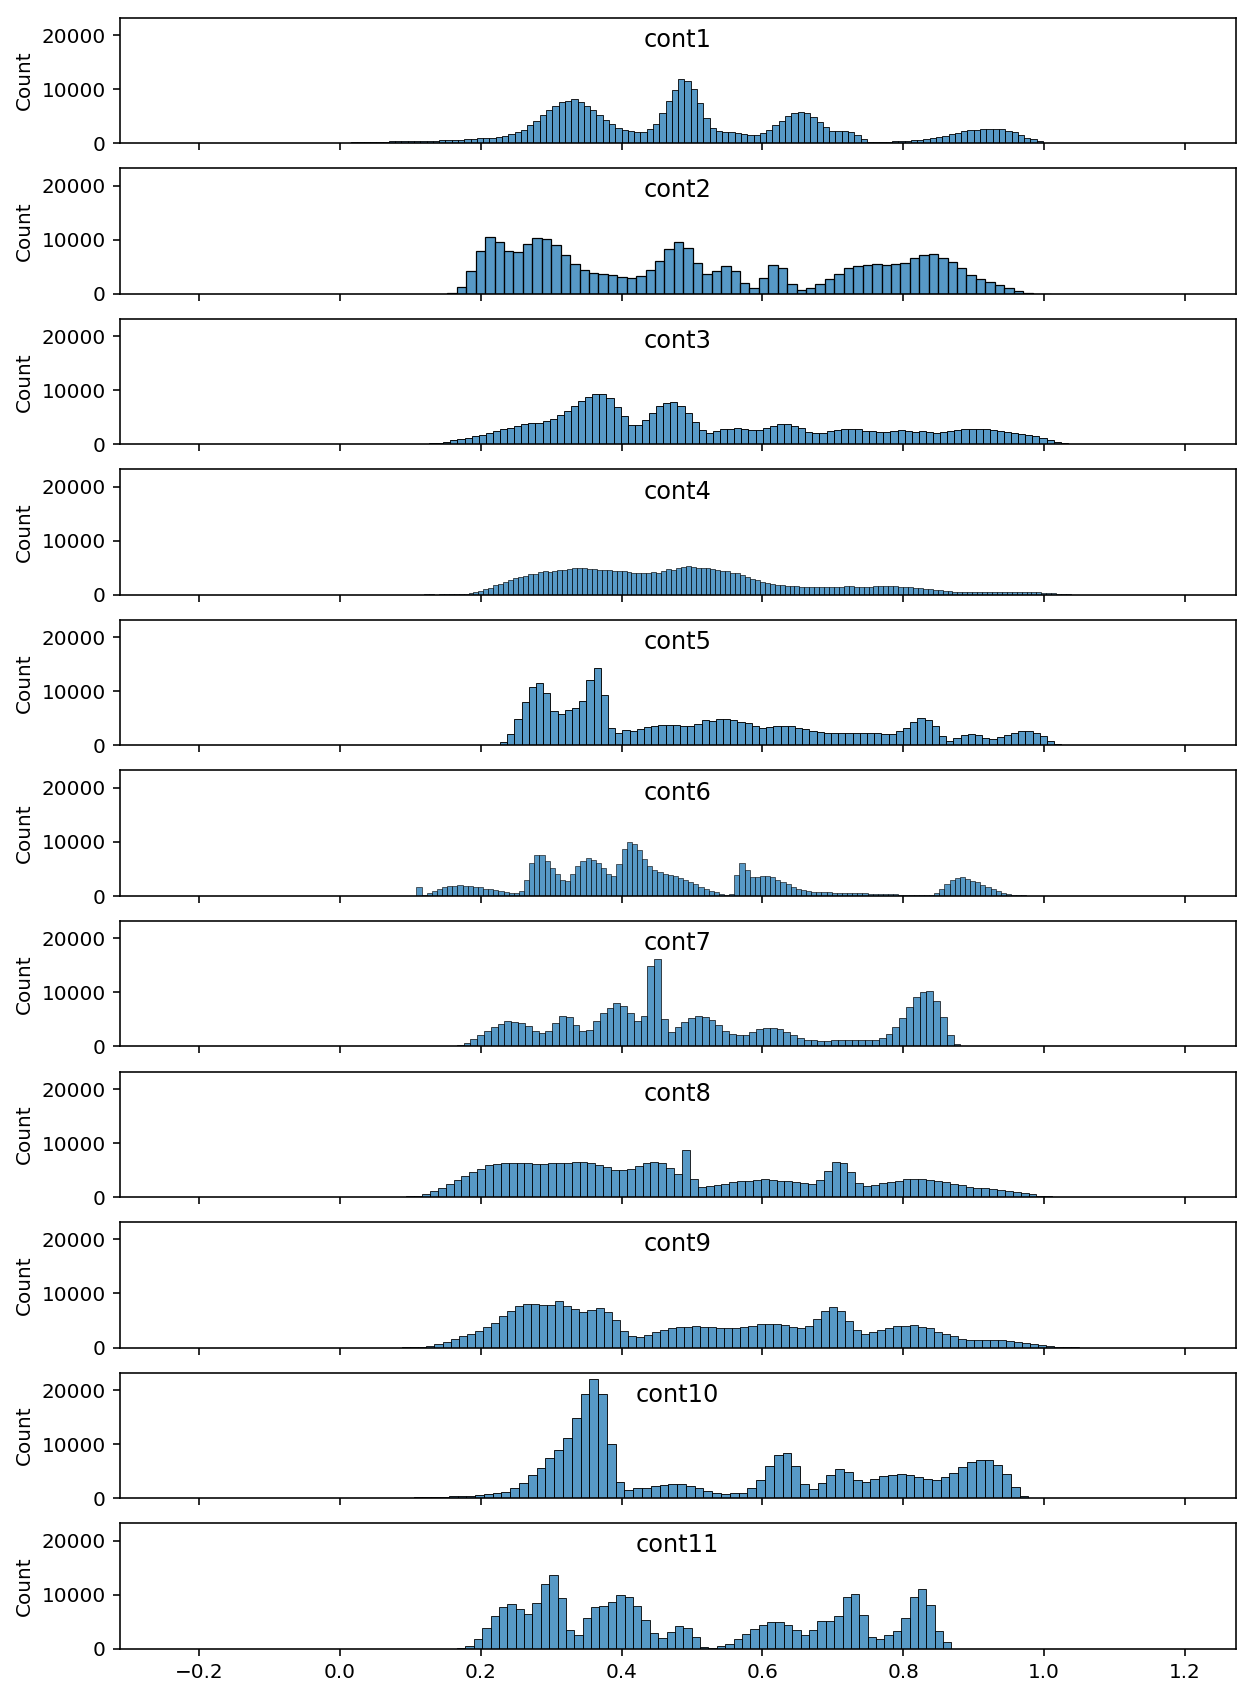

In [149]:
fig, axes = plt.subplots(11, 1, sharex=True, sharey=True, figsize=(10,15))
n = 0
for c in [train.columns[0], train.columns[3]] + train.columns[5:14].tolist():
    sns.histplot(ax=axes[n], data = train[c].values)
    axes[n].set_title(train.columns[n], pad = -14.5)
    n+=1

Посмотрим на оставшиеся распределения отдельно

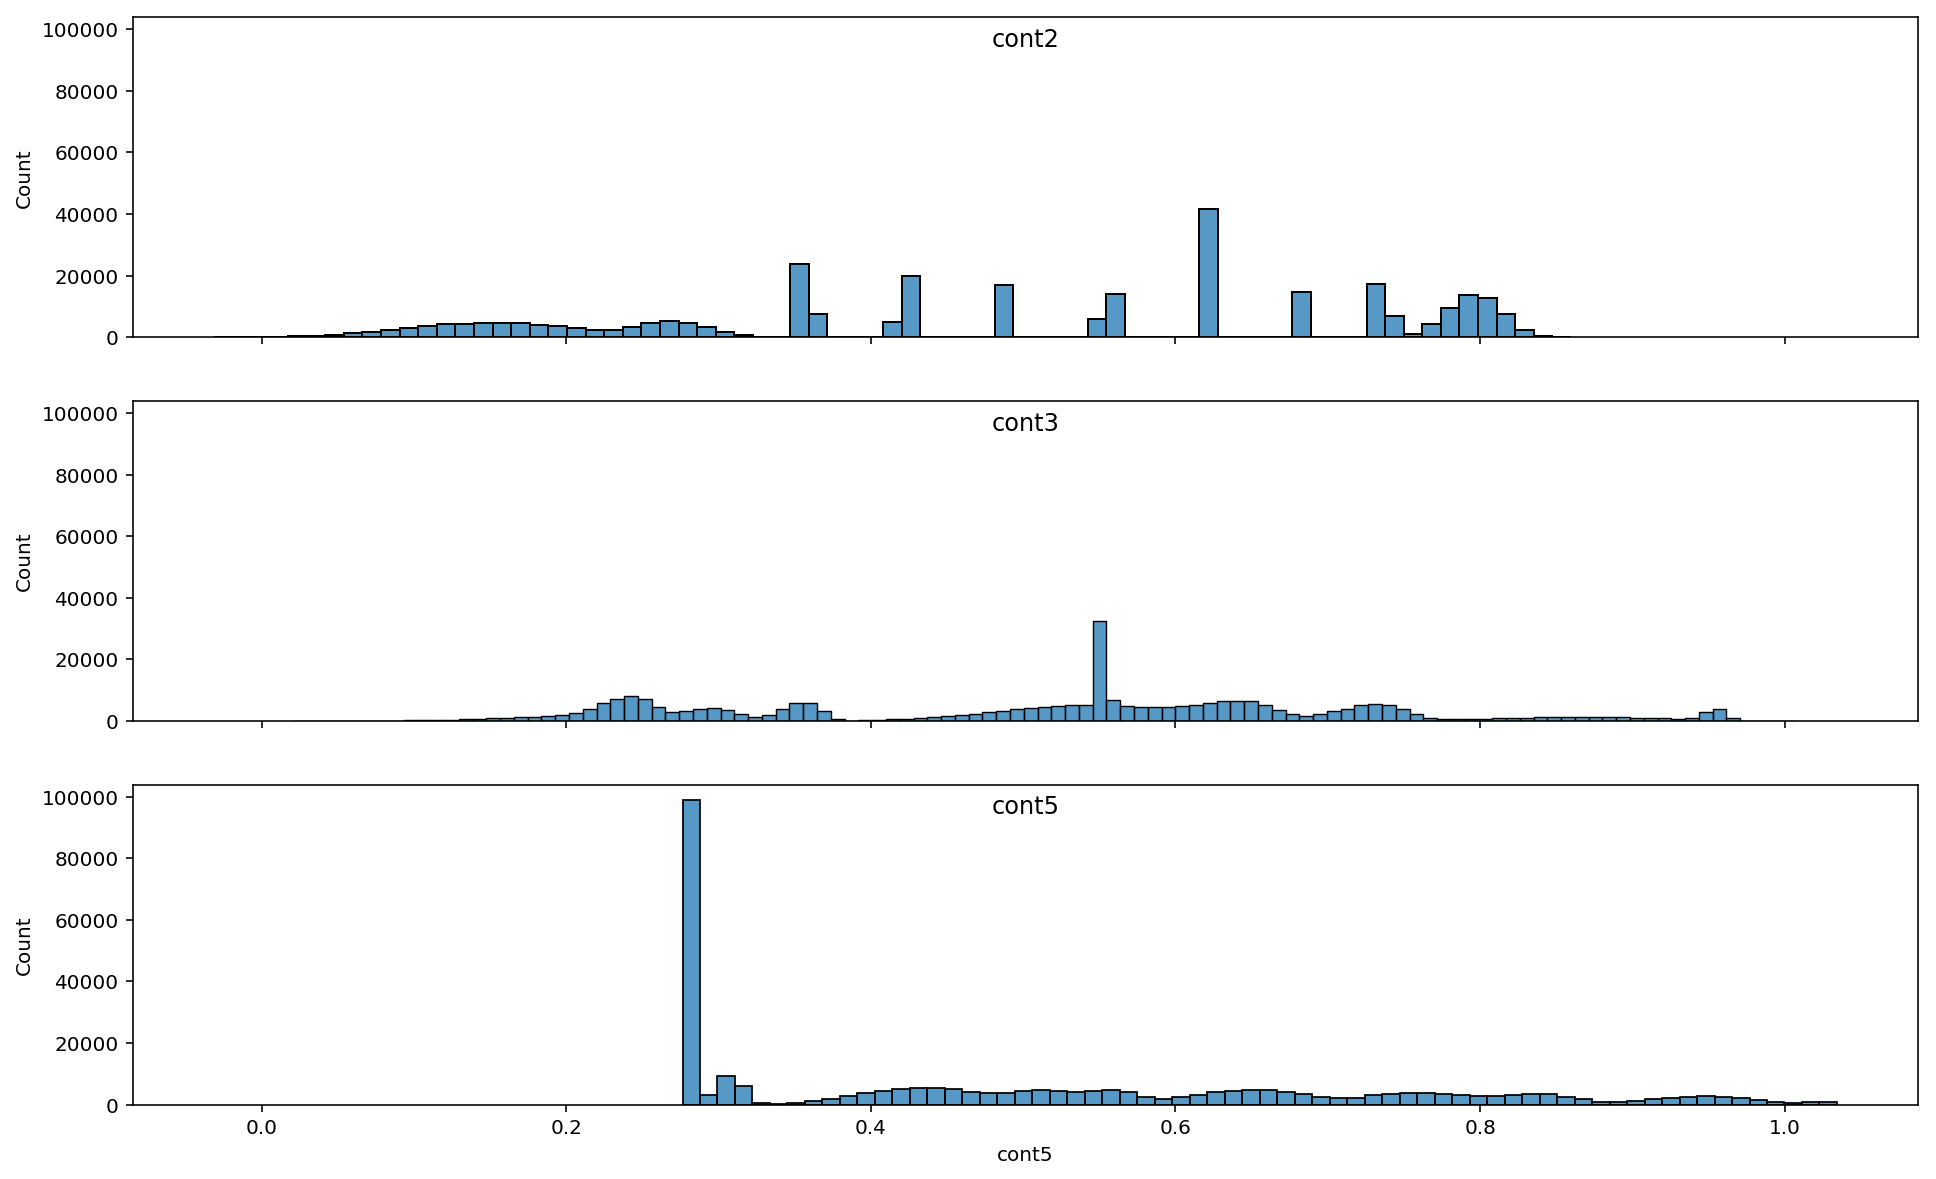

In [157]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(16,10))
sns.histplot(ax=axes[0], data = train.iloc[:,1])
lab2 = axes[0].set_title(train.columns[1], pad = -14.5)
sns.histplot(ax=axes[1], data = train.iloc[:,2])
lab3 = axes[1].set_title(train.columns[2], pad = -14.5)
sns.histplot(ax=axes[2], data = train.iloc[:,4])
lab5 = axes[2].set_title(train.columns[4], pad = -14.5)

Посмотрим на выбросы. Target исключен, у него слишком далёкая медиана

In [167]:
sorted_index = train.iloc[:,:14].median().sort_values(ascending=False).index
train_sorted=train[sorted_index]

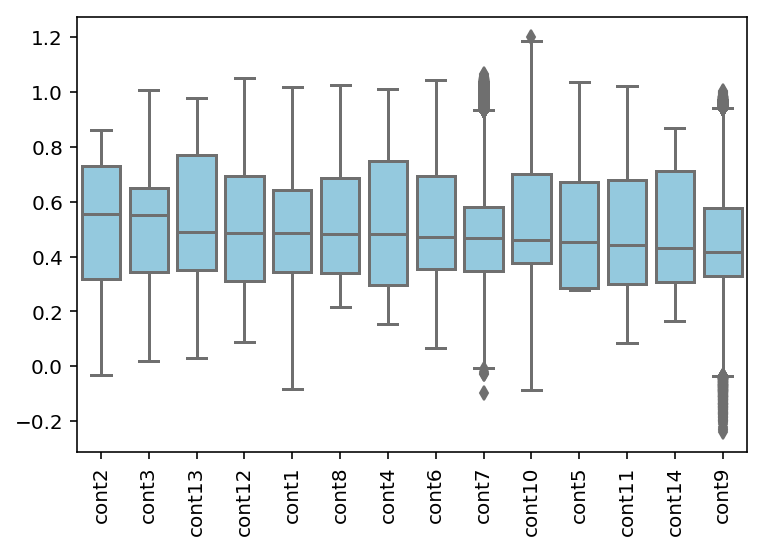

In [169]:
ax = sns.boxplot(data=train_sorted, color='skyblue')
lab = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)